In [1]:
import utils
import torch
from free_energy import sample_free_energy_direct_computation, analyze_free_energy, present_analysis
import matplotlib.pyplot as plt
import numpy as np

# Regular simplex

In [2]:
name = "simplex"
d = 100
filename = f"results/free_energy_{name}_{d}.npz"

x = torch.tensor(utils.generate_simplex(d), dtype=torch.float32)
# temp = torch.linspace(-10, 10, 500).exp()
# fe_samples = sample_free_energy_direct_computation(x, temp, 10000, 1000, True)

# temp = temp.numpy()
# fe_samples = fe_samples.numpy()

# np.savez(filename, fe_samples=fe_samples, temp=temp)
fe_samples, temp = np.load(filename).values()

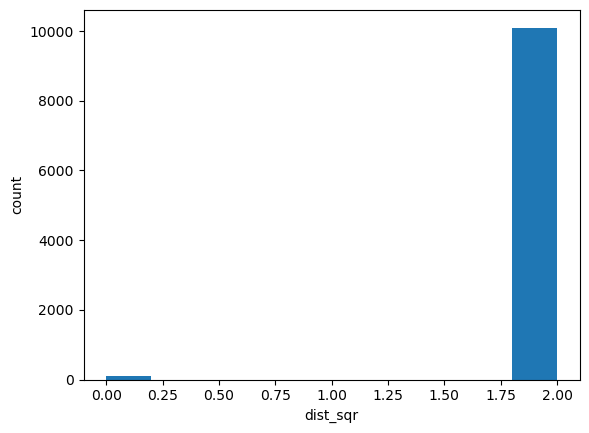

In [3]:
dist_sqr_mat = utils.compute_pw_dist_sqr(x)
plt.hist(dist_sqr_mat.flatten())
plt.xlabel("dist_sqr")
plt.ylabel("count")
plt.show()

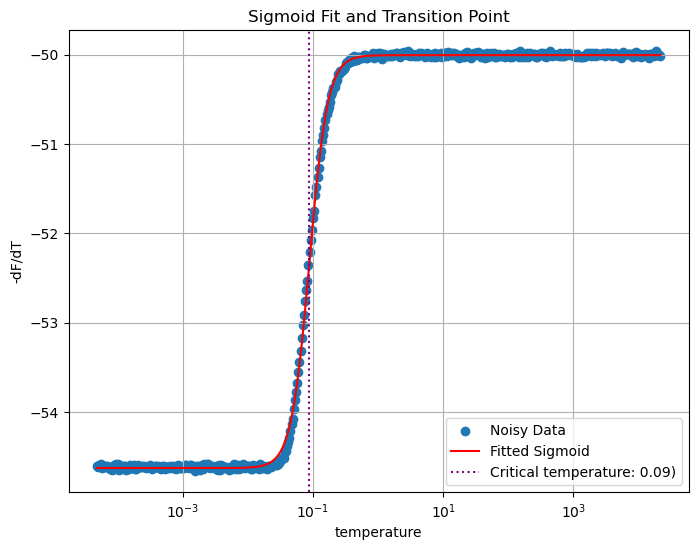

Critical temperature: 0.09
Noise std: 0.30
Transition interval: [0.04, 0.18]


In [4]:
analysis_results = analyze_free_energy(fe_samples, temp)
present_analysis(analysis_results)

# Regular cross polytope

In [5]:
name = "cross_polytope"
d = 100
filename = f"results/free_energy_{name}_{d}.npz"

x = torch.tensor(utils.generate_cross_polytope(d), dtype=torch.float32)
# temp = torch.linspace(-10, 10, 500).exp()
# fe_samples = sample_free_energy_direct_computation(x, temp, 10000, 1000, True)

# temp = temp.numpy()
# fe_samples = fe_samples.numpy()

# np.savez(filename, fe_samples=fe_samples, temp=temp)
fe_samples, temp = np.load(filename).values()

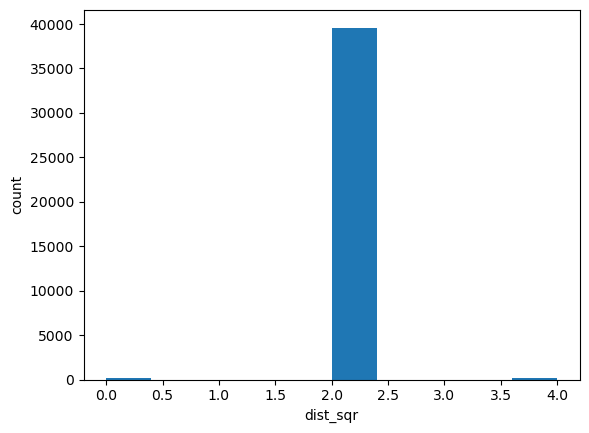

In [6]:
dist_sqr_mat = utils.compute_pw_dist_sqr(x)
plt.hist(dist_sqr_mat.flatten())
plt.xlabel("dist_sqr")
plt.ylabel("count")
plt.show()

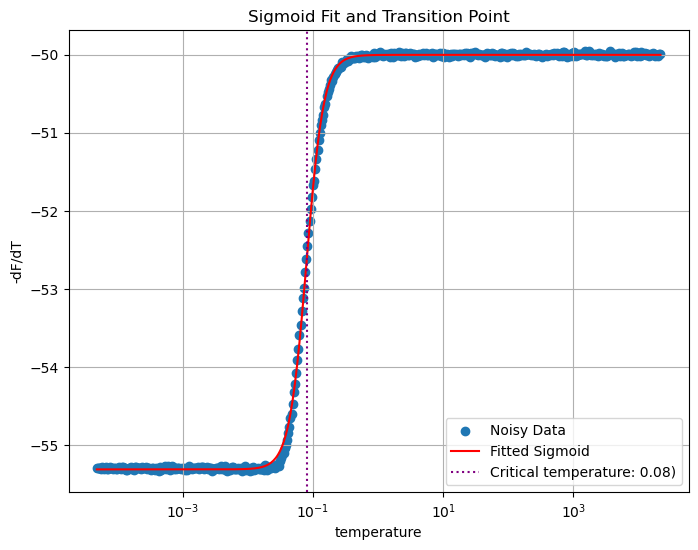

Critical temperature: 0.08
Noise std: 0.28
Transition interval: [0.04, 0.16]


In [7]:
analysis_results = analyze_free_energy(fe_samples, temp)
present_analysis(analysis_results)

In [8]:
name = "cross_polytope"
d = 50
filename = f"results/free_energy_{name}_{d}.npz"

x = torch.tensor(utils.generate_cross_polytope(d), dtype=torch.float32)
# temp = torch.linspace(-10, 10, 500).exp()
# fe_samples = sample_free_energy_direct_computation(x, temp, 10000, 1000, True)

# temp = temp.numpy()
# fe_samples = fe_samples.numpy()

# np.savez(filename, fe_samples=fe_samples, temp=temp)
fe_samples, temp = np.load(filename).values()

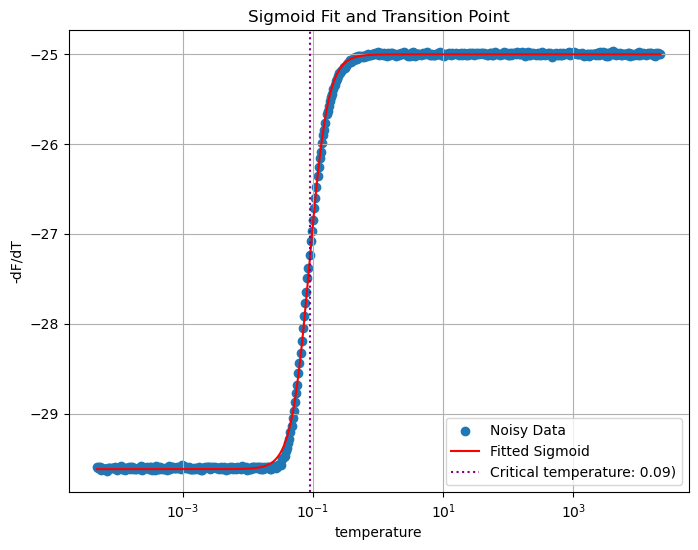

Critical temperature: 0.09
Noise std: 0.30
Transition interval: [0.04, 0.18]


In [9]:
analysis_results = analyze_free_energy(fe_samples, temp)
present_analysis(analysis_results)

# MNIST

In [10]:
name = "mnist"
filename = f"results/free_energy_{name}.npz"

data = utils.MnistDataset()
x = torch.stack([data[i]['images'].view(-1) for i in range(len(data))], dim=0)

# temp = torch.linspace(-10, 10, 500).exp()
# fe_samples = sample_free_energy_direct_computation(x, temp, 10000, 10, True)

# temp = temp.numpy()
# fe_samples = fe_samples.numpy()

# np.savez(filename, fe_samples=fe_samples, temp=temp)
fe_samples, temp = np.load(filename).values()

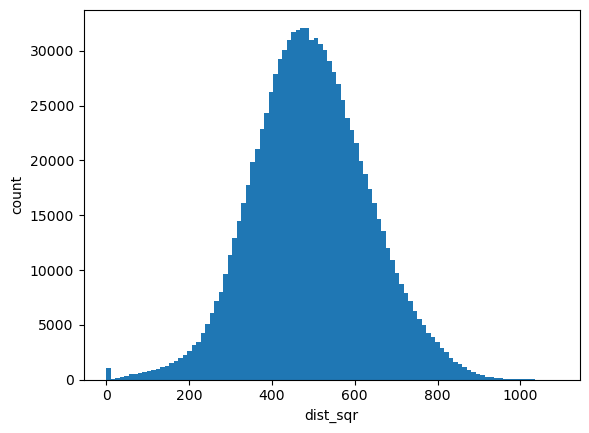

In [11]:
dist_sqr_mat = utils.compute_pw_dist_sqr(x[:1000].cuda())
plt.hist(dist_sqr_mat.flatten(), bins=100)
plt.xlabel("dist_sqr")
plt.ylabel("count")
plt.show()

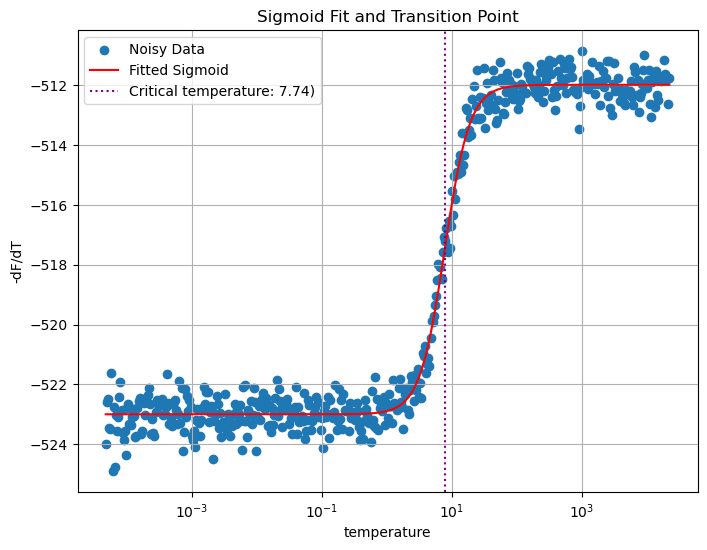

Critical temperature: 7.74
Noise std: 2.78
Transition interval: [2.92, 20.48]


In [12]:
analysis_results = analyze_free_energy(fe_samples, temp)
present_analysis(analysis_results)

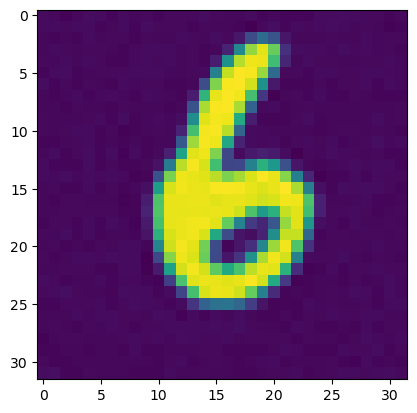

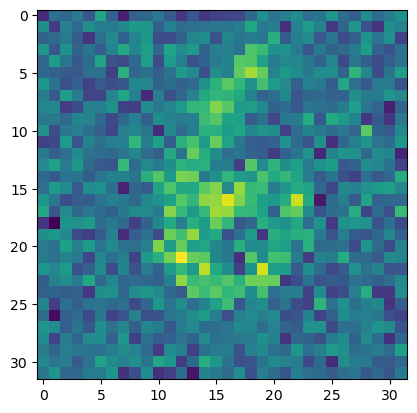

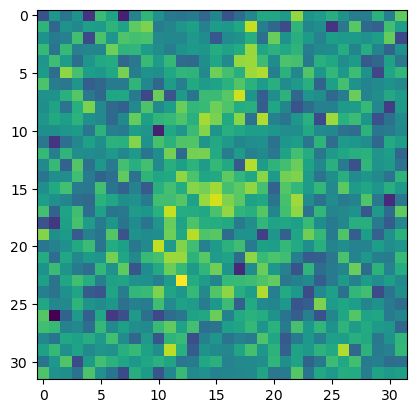

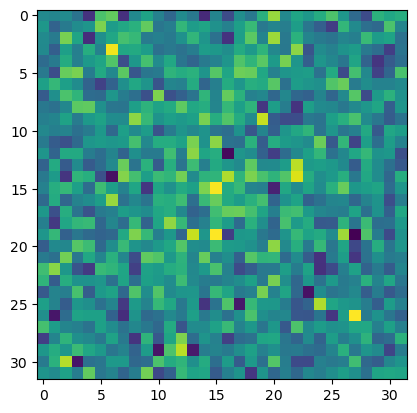

In [15]:
import numpy as np
import matplotlib.pyplot as plt


idx = 2

plt.figure()
plt.imshow(np.load("results/sde_samples.npz")["states"][-1][idx][0])

plt.figure()
plt.imshow(np.load("results/sde_samples.npz")["states"][-200][idx][0])

plt.figure()
plt.imshow(np.load("results/sde_samples.npz")["states"][-300][idx][0])

plt.figure()
plt.imshow(np.load("results/sde_samples.npz")["states"][-400][idx][0])

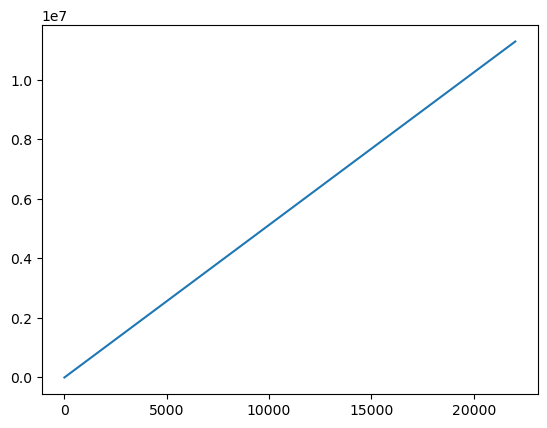

In [18]:
mnist = np.load("results/free_energy_mnist.npz")

plt.plot(mnist["temp"], mnist["fe_samples"])

In [22]:
import utils


image = utils.MnistDataset()[0]["images"]

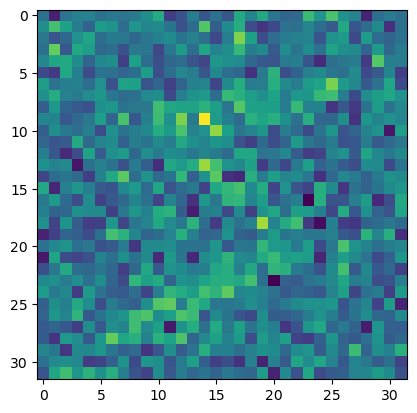

In [27]:
import torch


t = 2.92

x = image + torch.randn_like(image) * np.sqrt(t)
plt.imshow(x[0])